In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

# Simulations

## Finding crossover point that minimizes coins spent

In [229]:
NUM_TOTAL_STANDEES = 144

NUM_BLACK = 48
PROB_BLACK = 0.55

NUM_SILVER = 48
PROB_SILVER = 0.4

NUM_GOLD = 48
PROB_GOLD = 0.05

standees = list(range(1,145))
probs = [PROB_BLACK/NUM_BLACK]*NUM_BLACK + [PROB_SILVER/NUM_SILVER]*NUM_SILVER + [PROB_GOLD/NUM_GOLD]*NUM_GOLD

#averages vs crossover point
averages = []
#crossovers = list(range(, 115))

for crossover in [144]:
    
    coins = []
    
    for _ in range(100):
    
        coins_spent = 0
    
        standees_chosen = set([1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45])
    
        while len(standees_chosen) < crossover:
    
            coins_spent += 10
        
            standees_chosen.add(np.random.choice(standees, p = probs))

        # adding the coins for getting the rest of the standees
        coins_spent += (NUM_TOTAL_STANDEES - len(standees_chosen)) * 30

        coins.append(coins_spent)

    averages.append(sum(coins)/len(coins))


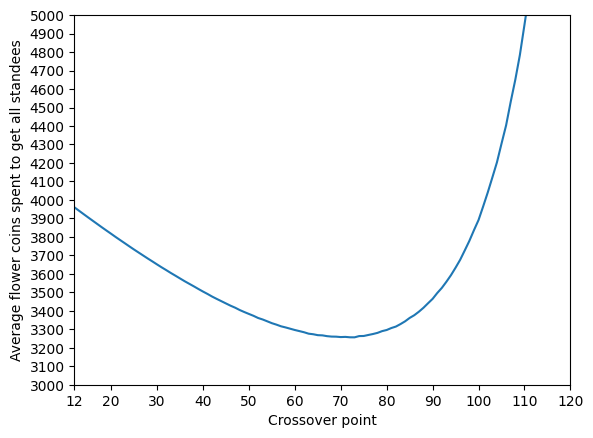

In [224]:
plt = sns.lineplot(x = crossovers, y = averages)

plt.set_xlim(12, 115)
plt.set_ylim(3000, 5000)

plt.set_xticks([12] + list(range(20, 130, 10)))
plt.set_yticks(range(3000, 5100, 100))

plt.set_xlabel("Crossover point")
plt.set_ylabel("Average flower coins spent to get all standees")

plt.figure.savefig("flower-coin-min.png", dpi = 300)

## Proving that this crossover point agrees with analytical formula

In [135]:
NUM_TOTAL_STANDEES = 144

NUM_BLACK = 48
PROB_BLACK = 0.55

NUM_SILVER = 48
PROB_SILVER = 0.4

NUM_GOLD = 48
PROB_GOLD = 0.05

standees = list(range(1,145))
probs = [PROB_BLACK/NUM_BLACK]*NUM_BLACK + [PROB_SILVER/NUM_SILVER]*NUM_SILVER + [PROB_GOLD/NUM_GOLD]*NUM_GOLD
    

all_coins_spent = []
all_num_10_30 = []
all_crossover_points = []

for _ in range(0,10000):

    coins_spent = 0
    num_10_30 = []
    crossover_point = 0

    nB = 12
    nS = 0
    nG = 0

    probs_left = probs.copy()
    
    for standee in [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45]:
        ind = standees.index(standee)
        probs_left[ind] = 0

    probs_left[:] = [prob / sum(probs_left) for prob in probs_left]

    while nB + nS + nG < 144:

        if 0.55*nB + 0.4*nS + 0.05*nG >= 32: # if true, we should use the 30-coin method
            
            coins_spent += 30
            num_10_30.append(30)
            
            standee = np.random.choice(standees, p = probs_left)
            
            if standee < 49:
                nB += 1
            elif standee < 97:
                nS += 1
            else:
                nG += 1

            ind = standees.index(standee)
            probs_left[ind] = 0
            if sum(probs_left) > 0:
                probs_left[:] = [prob / sum(probs_left) for prob in probs_left]
        
        else: # we should use the 10-coin method

            crossover_point = nB + nS + nG
            
            coins_spent += 10
            
            standee = np.random.choice(standees, p = probs)
            ind = standees.index(standee)
            
            if probs_left[ind] > 0:
                num_10_30.append(10)
                if standee < 49:
                    nB += 1
                elif standee < 97:
                    nS += 1
                else:
                    nG += 1
                probs_left[ind] = 0
                if sum(probs_left) > 0:
                    probs_left[:] = [prob / sum(probs_left) for prob in probs_left]

    all_coins_spent.append(coins_spent)
    all_num_10_30.append(num_10_30)
    all_crossover_points.append(crossover_point)
    

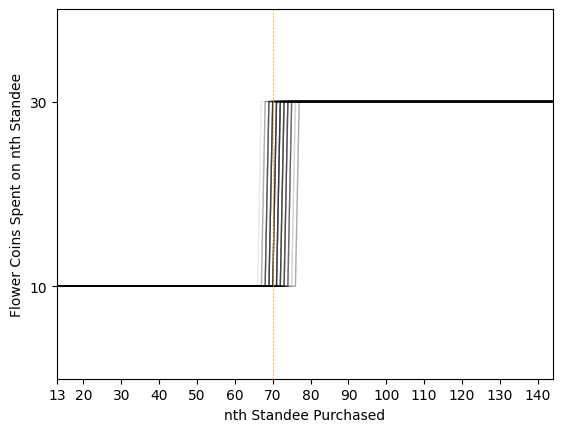

In [212]:
for i, y in enumerate(all_num_10_30):
    if i % 100 == 0:
        plt = sns.lineplot(
            x = list(range(13, 145)),
            y = y,
            linewidth = 1,
            color = "black",
            alpha = 0.09
        )

plt.axvline(70, color = "orange", linestyle = "--", linewidth = 0.5)

plt.set_xlim(13, 144)
plt.set_ylim(0, 40)

plt.set_xticks([13] + list(range(20, 150, 10)))
plt.set_yticks([10, 30])

plt.set_xlabel("nth Standee Purchased")
plt.set_ylabel("Flower Coins Spent on nth Standee")

plt.figure.savefig("simulation-jump.png", dpi = 300)

Average Coins 

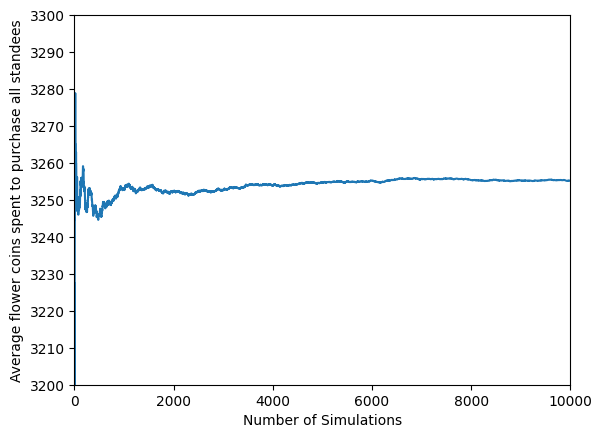

In [214]:
cum_averages = []
    
for i, val in enumerate(all_coins_spent):

    if i == 0:
        cum_averages.append(val)
        continue

    cum_averages.append((cum_averages[i-1] * i + val)/(i + 1))

#sns.lineplot(x = [0, 10000], y = [3255, 3255], linestyle = "--", color = "gray")
plt = sns.lineplot(cum_averages)

plt.set_xlim(0, 10000)
plt.set_ylim(3200, 3300)

#plt.set_xticks(range(0, 11000, 1000))
plt.set_yticks(range(3200, 3310, 10))

plt.set_xlabel("Number of Simulations")
plt.set_ylabel("Average flower coins spent to purchase all standees")

plt.figure.savefig("average-coins-spent.png", dpi = 300)

In [145]:
cum_averages[-1]

3255.160000000004

Average crossover point

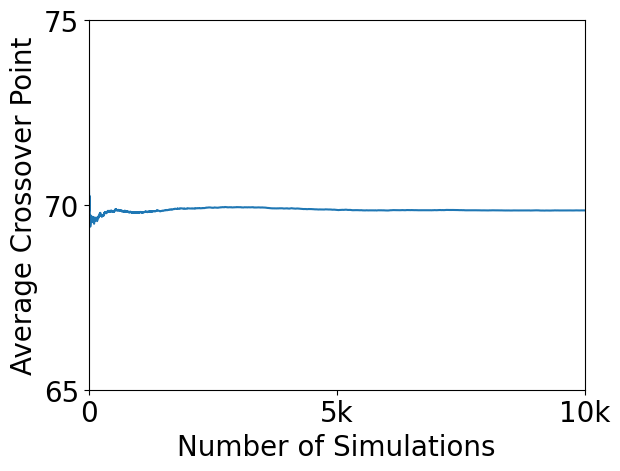

In [203]:
cum_averages = []
    
for i, val in enumerate(all_crossover_points):

    if i == 0:
        cum_averages.append(val)
        continue

    cum_averages.append((cum_averages[i-1] * i + val)/(i + 1))

#sns.lineplot(x = [0, 10000], y = [69.85, 69.85], linestyle = "--", color = "gray")
plt = sns.lineplot(cum_averages)

plt.set_xlim(0, 10000)
plt.set_ylim(65, 75)

plt.set_xticks([0, 5000, 10000], labels = ["0", "5k", "10k"], size = 20)
plt.set_yticks([65, 70, 75], labels = [65, 70, 75], size = 20)

plt.set_xlabel("Number of Simulations", fontsize = 20)
plt.set_ylabel("Average Crossover Point", fontsize = 20)

plt.figure.savefig("average-crossover-point.png", dpi = 300, bbox_inches = "tight")

In [172]:
cum_averages[-1]

69.85150000000002

## Generating Lookup Graph

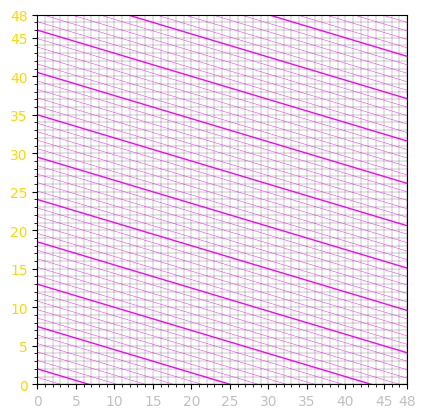

In [37]:
nS = np.arange(0, 49, 1)

for nT in range(0, 144):
    
    plt = sns.lineplot(
        x = nS, 
        y = -0.3*nS + 1.1*nT - 64, 
        legend = False, 
        linewidth = 1 if nT % 5 == 0 else 0.3,
        color = "magenta" if nT % 5 == 0 else "magenta"
    )

plt.set_xlim(0, 48)
plt.set_ylim(0, 48)

major_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 48]
minor_ticks = range(0, 49, 1)

plt.set_xticks(major_ticks, labels = major_ticks, color = "silver")
plt.set_xticks(minor_ticks, minor = True)
plt.set_yticks(major_ticks, labels = major_ticks, color = "gold")
plt.set_yticks(minor_ticks, minor = True)
plt.set_aspect('equal')
plt.grid(which = "both", linewidth = 0.15, color = "black")